# Analysis

Trends Observed:
    * a
    *
    *

Import dependencies

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy
import seaborn as sns

Load CSV data into pandas DataFrames

In [18]:
drugs_df = pd.read_csv(os.path.join('Resources', 'mouse_drug_data.csv'))
trials_df = pd.read_csv(os.path.join('Resources', 'clinicaltrial_data.csv'))
trials_df = trials_df.merge(drugs_df, how='left', on='Mouse ID')
trials_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [11]:
drug_response_df = trials_df.pivot_table(values='Tumor Volume (mm3)', index=['Drug','Timepoint'])
drug_response_df

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
           25           39.939528
           30           38.769339
           35           37.816839
           40           36.958001
           45           36.236114
Ceftamin   0            45.000000
           5            46.503051
           10           48.285125
           15           50.094055
           20           52.157049
           25           54.287674
           30           56.769517
           35           58.827548
           40           61.467895
           45           64.132421
Infubinol  0            45.000000
           5            47.062001
           10           49.403909
           15           51.296397
           20           53.197691
           25           55.715252
           30           58.299397
           35           60.742461
           40           63.

In [128]:
drug_response_mean_df = trials_df.pivot_table(values='Tumor Volume (mm3)', index=['Timepoint'], columns='Drug')
drug_response_sem_df = trials_df.pivot_table(values='Tumor Volume (mm3)', index=['Timepoint'], columns='Drug', aggfunc=scipy.stats.sem)
drug_response_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


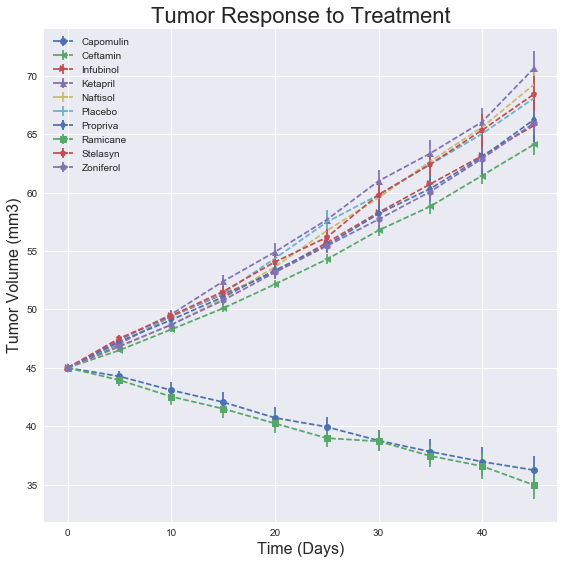

In [129]:
fig, ax = plt.subplots(figsize=(8,8))
xaxis = drug_response_sem_df.index
marker_formats = ['--o', '--<', '-->', '--^', '--+', '--x', '--d', '--s', '--p', '--h' ]
ax.set_title('Tumor Response to Treatment', fontsize=22)
ax.set_xlabel('Time (Days)' , fontsize=16)
ax.set_ylabel('Tumor Volume (mm3)', fontsize=16)
for mrkformat,drug in zip(marker_formats,drug_response_mean_df.columns):
    ax.errorbar(xaxis, drug_response_mean_df[drug], xerr=0.0, yerr = drug_response_sem_df[drug],\
                fmt=mrkformat, label=drug)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Metastatic Response to Treatment

In [115]:
drug_response_mean_df = trials_df.pivot_table(values='Metastatic Sites', index=['Timepoint'], columns='Drug')
drug_response_sem_df = trials_df.pivot_table(values='Metastatic Sites', index=['Timepoint'], columns='Drug', aggfunc=scipy.stats.sem)
drug_response_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


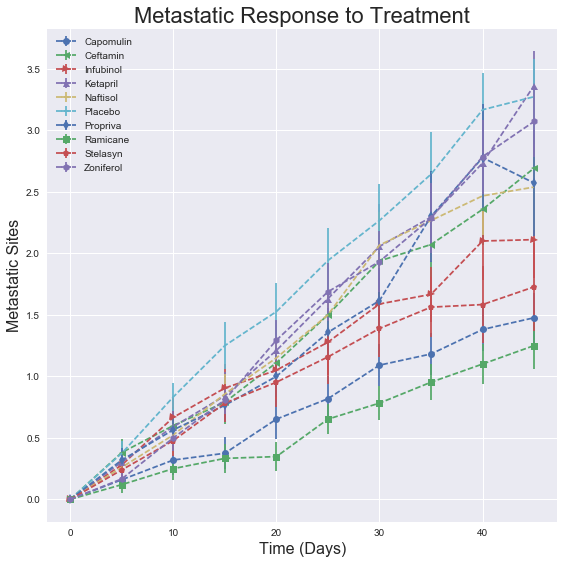

In [125]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Metastatic Response to Treatment', fontsize=22)
ax.set_xlabel('Time (Days)' , fontsize=16)
ax.set_ylabel('Metastatic Sites', fontsize=16)
for mrkformat,drug in zip(marker_formats,drug_response_mean_df.columns):
    ax.errorbar(xaxis, drug_response_mean_df[drug], xerr=0.0, yerr = drug_response_sem_df[drug],\
                fmt=mrkformat, label=drug)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Survival Rates

In [136]:
survive_mean_df = trials_df.pivot_table(values='Mouse ID', index=['Timepoint'], columns='Drug',aggfunc=np.count_nonzero)
survive_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


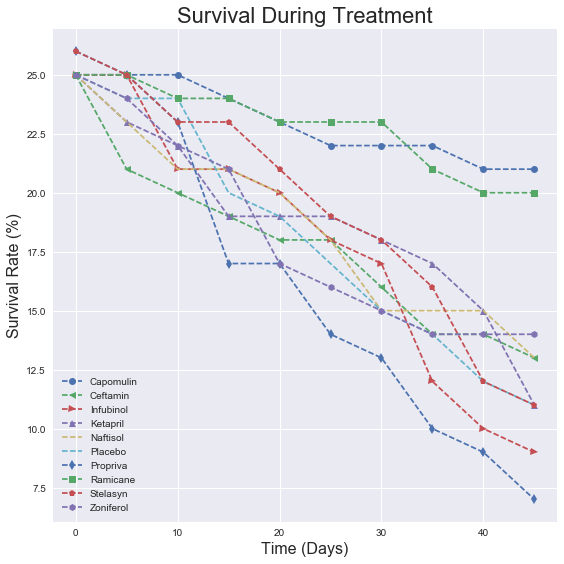

In [140]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Survival During Treatment', fontsize=22)
ax.set_xlabel('Time (Days)' , fontsize=16)
ax.set_ylabel('Survival Rate (%)', fontsize=16)
for mrkformat,drug in zip(marker_formats,survive_mean_df.columns):
    ax.plot(xaxis, survive_mean_df[drug],mrkformat, label=drug)
plt.legend(loc='best')
plt.tight_layout()
plt.show()